Lab 1 <br>
David Kahn <br>
9/7/2016

Part 1

In Freemont Washington, the Freemont Bridge experiences a lot of foot traffic. Because of this large influx of pedestrians, the city installed a bike counter that acts as a pedestrian counter. Using this, the city was able to tally up the total number of people crossing the bridge in each direction per day. This data was then used to find valuable information regarding the activity on the bridge, such as, the most active day of the week, the average number of people per day, and so on. The goal of the following data analysis was to calculate such values as previously listed. For this initial part calculation, the data provided only contains the data from one month. The data provided was in form of Date, number of people that crossed going West, number of people that crossed going East.

In [38]:
from datetime import date
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import linregress
from fractions import Fraction


The mean of West is     1497.5666666666666
The median of West is   1573.5
The mean of East is     1540.4333333333334
The median of East is   1648.0

The max number of personel that passed the detector on the west is              2270
The max number of personel that passed the detector on the east is              2361
The index of the max number of personel going west in the data set was on day   22
The index of the max number of personel going east in the data set was on day   21

The average number of people that crossed the bridge on:
     Monday      3239
     Tuesday     3817
     Wednesday   4054
     Thursday    3490
     Friday      3095
     Saturday    1847
     Sunday      1273



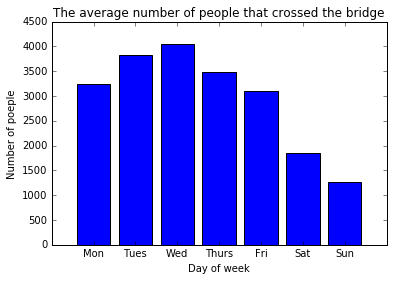

In [26]:
#File Reading
#Emma Anderson, Big Data, 9/7/16
#open and save the file for reading
data_file = open("FreBridge1.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];
#create empty lists for westbound and eastbound bikes
west = [];
east = [];    
for jj in range(len(data_list)):
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

#print(west);
#print(east)

#______________________________________________________________________________________________________________________

#David Kahn
#9/7/2016

print("");

print("The mean of West is    ", st.mean(west));
print("The median of West is  ", st.median(west));
#print(st.mode(west));
print("The mean of East is    ", st.mean(east));
print("The median of East is  ", st.median(east));
#print(st.mode(east));

print("");
#Credit for index code goes to James Reed;
print("The max number of personel that passed the detector on the west is             ", max(west));
print("The max number of personel that passed the detector on the east is             ", max(east));
#credit for index code goes to James Reed
print("The index of the max number of personel going west in the data set was on day  ", west.index(max(west)));
print("The index of the max number of personel going east in the data set was on day  ", east.index(max(east)));

combine = [];
dateofdata = [];
dateofdata_2 = [];
weekday_list = [];
combine_weekday = [];
list_mon = [];
list_tues = [];
list_wed = [];
list_thurs = [];
list_fri = [];
list_sat = [];
list_sun = [];

for x in range(len(west)):
    combine.append(west[x] + east[x]);

for y in range(len(data_list)):
    data_list[y][0] = data_list[y][0].split("/");
    dateofdata.append(data_list[y][0]);

for z in range(len(dateofdata)):
    dateofdata_2.append(int(dateofdata[z][0]));
    dateofdata_2.append(int(dateofdata[z][1]));
    dateofdata_2.append(2000 + int(dateofdata[z][2]));   

for week in range(1, int(len(dateofdata_2)), 3):
    value = date(dateofdata_2[week + 1], dateofdata_2[week - 1], dateofdata_2[week]).weekday();
    weekday_list.append(int(value));

for calc in range(len(weekday_list)):
    if weekday_list[calc] == 0:
        list_mon.append(int(combine[calc]));
    elif weekday_list[calc] == 1:
        list_tues.append(int(combine[calc]));
    elif weekday_list[calc] == 2:
        list_wed.append(int(combine[calc]));
    elif weekday_list[calc] == 3:
        list_thurs.append(int(combine[calc]));
    elif weekday_list[calc] == 4:
        list_fri.append(int(combine[calc]));
    elif weekday_list[calc] == 5:
        list_sat.append(int(combine[calc]));
    elif weekday_list[calc] == 6:
        list_sun.append(int(combine[calc]));

combine_weekday.append(int(st.mean(list_mon)));
combine_weekday.append(int(st.mean(list_tues)));
combine_weekday.append(int(st.mean(list_wed)));
combine_weekday.append(int(st.mean(list_thurs)));
combine_weekday.append(int(st.mean(list_fri)));
combine_weekday.append(int(st.mean(list_sat)));
combine_weekday.append(int(st.mean(list_sun)));

print(""); 
print("The average number of people that crossed the bridge on:");
print("     Monday     ", combine_weekday[0]);
print("     Tuesday    ", combine_weekday[1]);
print("     Wednesday  ", combine_weekday[2]);
print("     Thursday   ", combine_weekday[3]);
print("     Friday     ", combine_weekday[4]);
print("     Saturday   ", combine_weekday[5]);
print("     Sunday     ", combine_weekday[6]);

print("");

#following code was influenced by and taken from 
#http://stackoverflow.com/questions/17074772/using-text-on-y-axis-in-matplotlib-instead-of-numbers
#Written by user BergmannF
word_values = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"];
x_values = np.arange(1, len(word_values) + 1, 1);
plt.bar(x_values, combine_weekday, align='center');
plt.xticks(x_values, word_values);
plt.title("The average number of people that crossed the bridge");
plt.ylabel("Number of poeple");
plt.xlabel("Day of week");
plt.show();

The reason that there is no mode being printed, is because there was no unique mode in the data set. This caused the program to throw an error that was not wanted.

This data represents the amount of person traffic passing a detector on the Freemont bridge going West and East. Each data point is the total number of people that crossed the bridge in a specific day going in their respective direction. The data covers the span of one month. The mean of each data set represents the average amount of people that pass the detector on a daily basis. This would be beneficial for builder or planners that wanted to know the amount of person traffic going across the bridge. The median of each data set represents a possibly better representation of the data due to the high possibility of outliers. For example, if there was an event on one side of the bridge, and many people were using the bridge, then there would be a lot of foot traffic on said day. A median would be less affected by this unlike the mean.

From this data, I was also able to calculate the, on average, day of the week that recieved the most pedestrian traffic. As it can be seen in the graph, as well as the raw data directly above it, the most popular day of the week was Wednesday with an average of 4054 pedestrians, on either side of the road, per day. The reason that we can say this for certain, is because we grouped all of the data from each day of the week respectively, added all of the data points for each weekday together, and then divided by the number of datapoints for that weekday. This then resulted in an accurate mean for each day of the week allowing us to simply compare which of them was the greatest.

<br>
<br>
Part 2
<br>
In the second part of this data analysis, we attempted to predict the total number of pedestrians that will pass the detector on September 30th of 2016. The data file provided was larger than the one provided previously 

In [64]:
#File Reading
#Emma Anderson, Big Data, 9/7/16
#open and save the file for reading
data_file_2 = open("FreBridge2.csv", "r");
#create an empty list to store the data
data_list_2 = [];
#put all lines from the file into a list
for ii in data_file_2:
    data_list_2.append(ii);

#remove the first element (column header)
del data_list_2[0];
#create empty lists for westbound and eastbound bikes
west_2 = [];
east_2 = [];    
for jj in range(len(data_list_2)):
    #make into a list of lists of just numbers
    data_list_2[jj] = data_list_2[jj].split(",");
    #add data to specific lists for west and east
    west_2.append(int(data_list_2[jj][1]));
    east_2.append(int(data_list_2[jj][2]));

#print(west);
#print(east)

#______________________________________________________________________________________________________________________

#David Kahn
#9/17/2016

print("");

print("The mean of West is    ", st.mean(west_2));
print("The median of West is  ", st.median(west_2));
#print(st.mode(west));
print("The mean of East is    ", st.mean(east_2));
print("The median of East is  ", st.median(east_2));
#print(st.mode(east));

print("");
#Credit for index code goes to James Reed;
print("The max number of personel that passed the detector on the west is             ", max(west_2));
print("The max number of personel that passed the detector on the east is             ", max(east_2));
#credit for index code goes to James Reed
print("The index of the max number of personel going west in the data set was on day  ", west_2.index(max(west_2)));
print("The index of the max number of personel going east in the data set was on day  ", east_2.index(max(east_2)));

combine_2 = [];
dateofdata_3 = [];
dateofdata_4 = [];
combine_weekday_2 = [];
list_fri_2 = [];
firstday = [0, 0, 0];

for x in range(len(west_2)):
    combine_2.append(west_2[x] + east_2[x]);

for y in range(len(data_list_2)):
    data_list_2[y][0] = data_list_2[y][0].split("/");
    dateofdata_3.append(data_list_2[y][0]);

for z in range(len(dateofdata_3)):
    dateofdata_4.append(int(dateofdata_3[z][0]));
    dateofdata_4.append(int(dateofdata_3[z][1]));
    dateofdata_4.append(2000 + int(dateofdata_3[z][2]));   

for week in range(1, int(len(dateofdata_4)), 3):
    value = date(dateofdata_4[week + 1], dateofdata_4[week - 1], dateofdata_4[week]).weekday();
    if value == 4:
        list_fri_2.append(int(combine_2[int(week/3)]));
        firstday[0] = dateofdata_4[week + 1];
        firstday[1] = dateofdata_4[week - 1];
        firstday[2] = dateofdata_4[week];

# Commented block of code
"""combine_weekday_2.append(int(st.mean(list_mon_2)));
combine_weekday_2.append(int(st.mean(list_tues_2)));
combine_weekday_2.append(int(st.mean(list_wed_2)));
combine_weekday_2.append(int(st.mean(list_thurs_2)));
combine_weekday_2.append(int(st.mean(list_fri_2)));
combine_weekday_2.append(int(st.mean(list_sat_2)));
combine_weekday_2.append(int(st.mean(list_sun_2)));

print(""); 
print("The average number of people that crossed the bridge on:");
print("     Monday     ", combine_weekday_2[0]);
print("     Tuesday    ", combine_weekday_2[1]);
print("     Wednesday  ", combine_weekday_2[2]);
print("     Thursday   ", combine_weekday_2[3]);
print("     Friday     ", combine_weekday_2[4]);
print("     Saturday   ", combine_weekday_2[5]);
print("     Sunday     ", combine_weekday_2[6]);"""
print();

numbers = [];
for i in range(len(list_fri_2)):
    numbers.append(i);
slope, intercept, rvalue, pvalue, stderr = linregress(numbers, list_fri_2);
guess = slope*(len(numbers) + 4) + intercept;
print("Predicted number of people that will cross the bridge on September 30th 2016:  ", guess);


The mean of West is     1485.333799860042
The median of West is   1336
The mean of East is     1299.0881735479356
The median of East is   1183

The max number of personel that passed the detector on the west is              5087
The max number of personel that passed the detector on the east is              3008
The index of the max number of personel going west in the data set was on day   1343
The index of the max number of personel going east in the data set was on day   587

Predicted number of people that will cross the bridge on September 30th 2016:   3639.12177971


This data represents the calculated prediction for the number of people that will cross the bridge on September 30th. This value was calculated by taking a linear regression of all for the data points for Friday. From there I used the slope given by the linear regression combined with the y-intercept to get a predicted value that follows the average of all of the Fridays in the dataset.

I believe that it would be advantageous to also include a prediction calculated with a standard deviation, and mean giving me a new predicted value. From here I would take the average of the two predictions to form a prediction that can better represent the data.

I believe that the value that was predicted has a margin of error of about 500.